In [3]:
import pymaid

rm = pymaid.CatmaidInstance('server_url','http_user','http_pw','token')
nl = pymaid.get_neurons('annotation:glomerulus DA1')

# Access single attribute: e.g. cable lengths [um]
nl.cable_length

INFO  : Global CATMAID instance set. (pymaid.fetch)
INFO  : Looking for Annotation(s): glomerulus DA1 (pymaid.fetch)
INFO  : Found 19 skeletons with matching annotation(s) (pymaid.fetch)


array([ 1590.67658924,  1180.59748944,  1035.07685675,  1113.15667601,
        1215.92059396,  1183.49077365,  1059.72905251,  1870.86823752,
        1747.51170831,  1296.68648796,   836.56668753,   836.0672524 ,
        1117.75097496,   752.77376043,  1109.88614556,   756.52786559,
        1130.42225492,  1691.17427264,   715.76091012])

In [2]:
# .. or get a full summary as pandas DataFrame
df = nl.summary()
df.head()

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True
1,PN glomerulus DA1 57312 LK,57311,4874,421,156,163,105,1180.597489,NA,True
2,PN glomerulus DA1 57324 LK JSL,57323,4585,434,120,127,59,1035.076857,NA,True
3,PN glomerulus DA1 57354 GA,57353,4895,324,90,95,52,1113.156676,NA,True
4,PN glomerulus DA1 57382 ML,57381,7727,357,153,162,71,1215.920594,NA,True


In [3]:
# Reroot a single neuron to its soma
nl[0].soma

3005291

In [4]:
# .soma returns the treenode ID of the soma (if existing) and can be used to reroot
nl[0].reroot(nl[0].soma)

In [5]:
# You can also perform this operation on the entire CatmaidNeuronList
nl.reroot( nl.soma )

In [6]:
# Downsample by "skipping" N nodes (here: 10) 
nl_downsampled = nl.downsample( 10, inplace=False )
# More elaborate: resample to given resolution in nanometers (here: 1000nm = 1um)
nl_resampled = nl.resample( 1000, inplace=False )

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


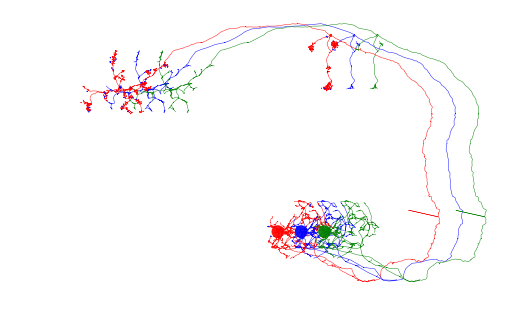

In [75]:
import matplotlib.pyplot as plt

# Plot an original neuron first
fig, ax = nl[0].plot2d(color='red')

# Shift the downsampled and resampled versions slightly and plot
n_ds = nl_downsampled[0].copy()
n_rs = nl_resampled[0].copy()

n_ds.nodes.x += 10000
n_rs.nodes.x += 20000

fig, ax = n_ds.plot2d(color='blue', ax=ax)
fig, ax = n_rs.plot2d(color='green', ax=ax)

plt.show()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


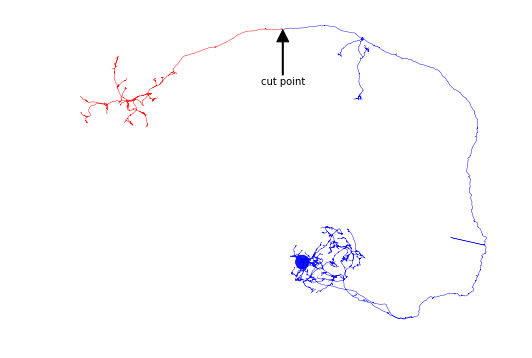

In [10]:
# Cut a neuron in two using either a treenode ID or (in this case) a node tag
distal, proximal = pymaid.cut_neuron( nl[0], cut_node='SCHLEGEL_LH' )
# Plot neuron fragments
fig, ax = distal.plot2d(color='red', method='2d', connectors=False)
fig, ax = proximal.plot2d(color='blue', method='2d', connectors=False, ax=ax)

# Annotate cut point
cut_coords = distal.nodes.set_index('treenode_id').loc[ distal.root, ['x','y'] ].values[0]
ax.annotate('cut point', xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


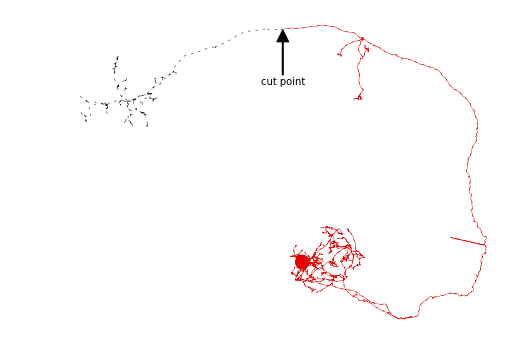

In [22]:
n = nl[0].prune_distal_to('SCHLEGEL_LH', inplace=False)

# Plot original neuron in black
fig, ax = nl[0].plot2d(color='black', method='2d', connectors=False, linestyle=(0, (5, 10)))

# Plot pruned neuron in red
fig, ax = n.plot2d(color='red', method='2d', connectors=False, ax=ax)

# Annotate cut point
ax.annotate('cut point', xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

In [23]:
# To undo, simply reload the neuron from server
nl[0].reload()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


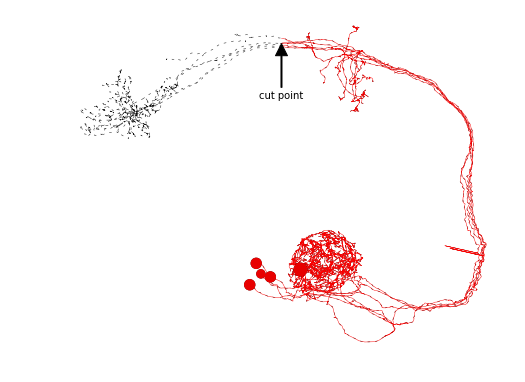

In [24]:
# These operations can also be performed on a collection of neurons
n = nl[:5].prune_distal_to('SCHLEGEL_LH', inplace=False)

# Plot original neurons in black
fig, ax = nl[:5].plot2d(color='black', method='2d', connectors=False, linestyle=(0, (5, 10)))

# Plot pruned neurons in red
fig, ax = n.plot2d(color='red', method='2d', connectors=False, ax=ax)

# Annotate cut point
ax.annotate('cut point', xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

In [25]:
# Again, let's undo
nl.reload()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


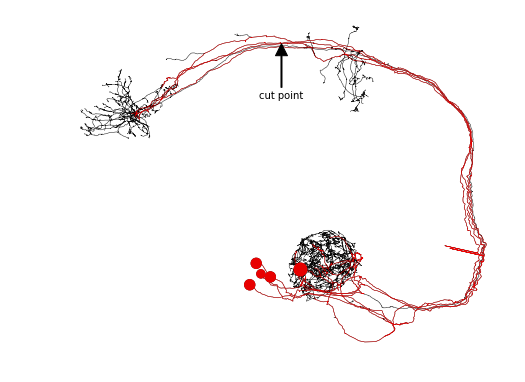

In [27]:
# Something more sophisticated: pruning by strahler index
n = nl[:5].prune_by_strahler( to_prune = [1,2,3], inplace=False )

# Plot original neurons in black
fig, ax = nl[:5].plot2d(color='black', method='2d', connectors=False)

# Plot pruned neurons in red
fig, ax = n.plot2d(color='red', method='2d', connectors=False, ax=ax)

# Annotate cut point
ax.annotate('cut point', xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

In [32]:
# Get a volume
lh = pymaid.get_volume('LH_R')

# Prune by volume
nl_lh = nl.prune_by_volume(lh, inplace=False)

nl_lh.summary().head()

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 27296 BH,27295,1696,299,61,62,4,326.624435,NA,False
1,PN glomerulus DA1 57312 LK,57311,813,295,29,31,1,239.542575,NA,False
2,PN glomerulus DA1 57324 LK JSL,57323,976,340,42,45,0,254.275453,NA,False
3,PN glomerulus DA1 57354 GA,57353,880,229,22,23,0,255.515595,NA,False
4,PN glomerulus DA1 57382 ML,57381,902,224,27,29,0,220.858928,NA,False


INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


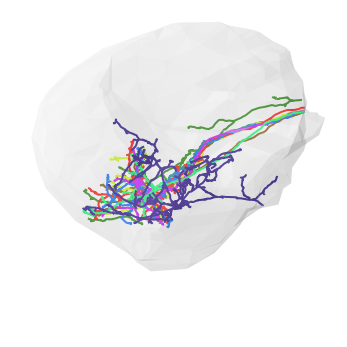

In [37]:
# Set color of volume
lh['color'] = (250,250,250,.2)

# Plot neurons that have some cable left and the volume
fig, ax = pymaid.plot2d([nl_lh[nl_lh.cable_length > 10], lh], 
                        method='3d', 
                        connectors=False, 
                        linewidth=2)

ax.dist=6
plt.show()